In [1]:
import numpy as np
import matplotlib.pyplot as plt
import glob, os

from scipy import optimize, stats

In [2]:
plt.rcParams["axes.linewidth"]  = 1.0
plt.rcParams["xtick.major.size"]  = 10
plt.rcParams["xtick.minor.size"]  = 5
plt.rcParams["ytick.major.size"]  = 10
plt.rcParams["ytick.minor.size"]  = 5
plt.rcParams["xtick.direction"]  = "in"
plt.rcParams["ytick.direction"]  = "in"
plt.rcParams["legend.frameon"] = 'False'
plt.rcParams['figure.figsize'] = [10, 10]
plt.rc('text', usetex=True)
plt.rc('font', family='serif', size=13)

import os
if os.environ['USER'] == 'dhayaa':
    os.environ['PATH'] = f"{os.environ['PATH']}:/software/texlive-2022-el8-x86_64/bin/x86_64-linux/"

    
COLORS = ["f07167","219ebc","c767ac","ffba0a","59a270"]
COLORS = ['#' + c if c[0] != '#' else c for c in COLORS ]

from cycler import cycler

# Update the default prop_cycle
plt.rcParams['axes.prop_cycle'] = cycler(color=COLORS)

# Load tables

In [3]:
DIR = '/scratch/midway3/dhayaa/SHEARTESTS_20240901/FIDUCIAL/'

----------BRIGHT STARS----------
P-val: 0.7029395450658356
Chi2, Chi2/ndof: 20.813897343780557 0.8325558937512223
--------------------------------


----------FAINT STARS----------
P-val: 0.3632208435697366
Chi2, Chi2/ndof: 26.853936492413837 1.0741574596965535
--------------------------------


----------FIELD CENTER----------
P-val: 0.07772699610669076
Chi2, Chi2/ndof: 35.61014501675677 1.4244058006702707
--------------------------------




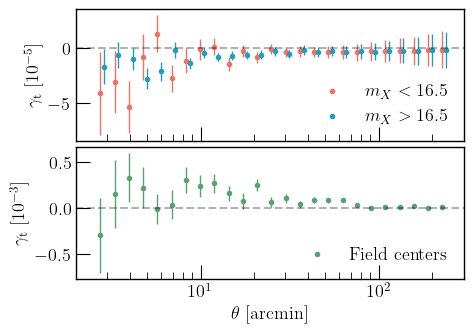

In [4]:
import matplotlib.pyplot as plt

fig, ax = plt.subplots(2, 1, figsize = (5,3.5), sharex = True)

plt.subplots_adjust(hspace = 0.05)
plt.xscale('log')

X = np.loadtxt(DIR + '/starshears_bright_treecorr.txt')
Y = np.loadtxt(DIR + '/starshears_bright_rands_treecorr.txt')
Z = np.loadtxt(DIR + '/starshears_bright_cov_treecorr.txt')[:25,:25]

NJK = 150
hartlap  = ((NJK - 25 - 2) / (NJK -  1))
dodelson = 1 / (1 + (25 - 3) * (NJK - 25 - 2) / (NJK - 25 - 1) / (NJK - 25 - 4) )
d = (X[:, 3] - Y[:, 3])
inv = np.linalg.inv(Z) * hartlap * dodelson
chi2 = d @ inv @ d
print("----------BRIGHT STARS----------")
print("P-val:", 1 - stats.chi2(df = len(d)).cdf(chi2))
print("Chi2, Chi2/ndof:", chi2, chi2/len(d))
print("--------------------------------\n\n")


ax[0].scatter(X[:, 0], 1e5 * (X - Y)[:, 3], lw = 0, s=16, color = COLORS[0], label = r'$m_X < 16.5$')
ax[0].errorbar(X[:, 0], 1e5 * (X - Y)[:, 3], yerr = 1e5 * (X)[:, 5], fmt = 'none', color = COLORS[0], lw = 0, elinewidth = 1)


    # ax.flatten()[i].scatter(x[:, 0] * (1 + 0.05), np.abs(coeffs[i]) * np.abs(x[:, 3]), s=13, label = 'SNR $>$ 60', color = COLORS[1])

    # ax.flatten()[i].errorbar(x[:, 0] * (1 + 0.05), np.abs(coeffs[i]) * np.abs(x[:, 3]), yerr = np.abs(coeffs[i]) * x[:, 7], 
    #                          alpha = 1, fmt = 'none', color = COLORS[1], lw = 0, elinewidth = 1)



X = np.loadtxt(DIR + '/starshears_faint_treecorr.txt')
Y = np.loadtxt(DIR + '/starshears_faint_rands_treecorr.txt')
Z = np.loadtxt(DIR + '/starshears_faint_cov_treecorr.txt')[:25,:25]

d = (X[:, 3] - Y[:, 3])
inv = np.linalg.inv(Z) * hartlap * dodelson

chi2 = d @ inv @ d

print("----------FAINT STARS----------")
print("P-val:", 1 - stats.chi2(df = len(d)).cdf(chi2))
print("Chi2, Chi2/ndof:", chi2, chi2/len(d))
print("--------------------------------\n\n")

# plt.scatter(X[:, 0], (X - Y)[:, 3], s = 100)
# ax[0].errorbar(X[:, 0] * (1 + 0.05), 1e5 * (X - Y)[:, 3], yerr = 1e5 * (X)[:, 5], lw = 0, elinewidth = 4, color = COLORS[1], label = r'$m_X > 16.5$')

ax[0].scatter(X[:, 0] * (1 + 0.05), 1e5 * (X - Y)[:, 3], lw = 0, s=16, color = COLORS[1], label = r'$m_X > 16.5$')
ax[0].errorbar(X[:, 0] * (1 + 0.05), 1e5 * (X - Y)[:, 3], yerr = 1e5 * (X)[:, 5], fmt = 'none', color = COLORS[1], lw = 0, elinewidth = 1)


X = np.loadtxt(DIR + '/fieldcenter_treecorr.txt')
Y = np.loadtxt(DIR + '/fieldcenter_rands_treecorr.txt')
Z = np.loadtxt(DIR + '/fieldcenter_cov_treecorr.txt')[:25,:25]

d = (X[:, 3] - Y[:, 3])
inv = np.linalg.inv(Z) * hartlap * dodelson

chi2 = d @ inv @ d

print("----------FIELD CENTER----------")
print("P-val:", 1 - stats.chi2(df = len(d)).cdf(chi2))
print("Chi2, Chi2/ndof:", chi2, chi2/len(d))
print("--------------------------------\n\n")

# plt.scatter(X[:, 0], (X - Y)[:, 3], s = 100)
# ax[1].errorbar(X[:, 0], 1e3 * (X - Y)[:, 3], yerr = 1e3 * (X)[:, 5], lw = 0, elinewidth = 4, color = COLORS[4], label = r'Field centers')

ax[1].scatter(X[:, 0], 1e3 * (X - Y)[:, 3], lw = 0, s=16, color = COLORS[4], label = r'Field centers')
ax[1].errorbar(X[:, 0], 1e3 * (X - Y)[:, 3], yerr = 1e3 * (X)[:, 5], fmt = 'none', color = COLORS[4], lw = 0, elinewidth = 1)


ax[0].set_ylabel(r'$\gamma_{\rm t}$ [$10^{-5}$]', size = 13)
ax[1].set_ylabel(r'$\gamma_{\rm t}$ [$10^{-3}$]', size = 13)
ax[1].set_xlabel(r'$\theta$ [arcmin]', size = 13)

ax[0].legend(fontsize = 13, frameon = False, loc = 'lower right')
ax[1].legend(fontsize = 13, frameon = False, loc = 'lower right')
ax[0].axhline(0, color = 'k', ls = '--', alpha = 0.3)
ax[1].axhline(0, color = 'k', ls = '--', alpha = 0.3)

ax[0].set_xlim(2,300)
ax[1].set_xlim(2,300)

plt.savefig('./gammat.pdf', dpi = 300, bbox_inches = 'tight')
plt.show()

# Cov

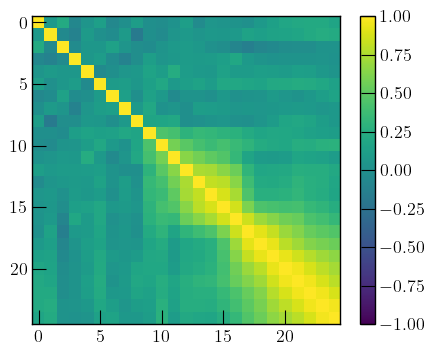

In [5]:
Z = np.loadtxt(DIR + '/starshears_faint_cov_treecorr.txt')[:25,:25]

Z = Z / np.sqrt(np.outer(np.diagonal(Z), np.diagonal(Z)))

plt.figure(figsize = (5,4))
plt.imshow(Z, vmin = -1, vmax = 1)
plt.colorbar()
plt.show()